# Aritficial Neural Network and SVM with Scikit-Learn

In [1]:
from IPython.display import Image
%matplotlib inline

## Loading the Breast Cancer Wisconsin dataset

In [2]:
"""
from sklearn import datasets
from sklearn.model_selection import train_test_split
bc = datasets.load_breast_cancer()
bc.keys()
X = bc.data
y = bc.target
print(X.shape, y.shape)
print(bc.feature_names)
print(bc.target_names)
"""

'\nfrom sklearn import datasets\nfrom sklearn.model_selection import train_test_split\nbc = datasets.load_breast_cancer()\nbc.keys()\nX = bc.data\ny = bc.target\nprint(X.shape, y.shape)\nprint(bc.feature_names)\nprint(bc.target_names)\n'

In [3]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/'
                 'machine-learning-databases'
                 '/breast-cancer-wisconsin/wdbc.data', header=None)


df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.shape

(569, 32)

In [5]:
from sklearn.preprocessing import LabelEncoder

X = df.iloc[:, 2:].values
y = df.iloc[:, 1].values
le = LabelEncoder()
y = le.fit_transform(y)
le.classes_

array(['B', 'M'], dtype=object)

In [6]:
print(y.shape)
print(y)

(569,)
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 1

Split Data into training and test sets

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, 
                     test_size=0.20,
                     random_state=2)

## Combining transformers and estimators in a pipeline

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline

In [9]:
# Train the model with MLP
mlp = MLPClassifier(hidden_layer_sizes=(15,8), max_iter=1000, learning_rate_init=0.001, random_state=1)
mlp.fit(X_train, y_train)
print('Training Accuracy :', mlp.score(X_train, y_train))
print('Test Accuracy :', mlp.score(X_test, y_test))

Training Accuracy : 0.6329670329670329
Test Accuracy : 0.6052631578947368


In [10]:
# Train the model with MLP after standardization
pipe_mlp = make_pipeline(StandardScaler(),
        MLPClassifier(hidden_layer_sizes=(15,8),  solver='lbfgs', 
                      max_iter=1000, random_state=1, learning_rate_init=0.001))

pipe_mlp.fit(X_train, y_train)
#y_pred = pipe_lr.predict(X_test)
print('Training Accuracy: %.3f' % pipe_mlp.score(X_train, y_train))
print('Test Accuracy: %.3f' % pipe_mlp.score(X_test, y_test))

Training Accuracy: 1.000
Test Accuracy: 0.956


## Support Vector Machines

In [11]:
from sklearn.svm import SVC

In [12]:
#train the model with SVM without standardization
svm = SVC(kernel='rbf', gamma=0.1, C=1, random_state=1)
svm.fit(X_train, y_train)
print('Training Accuracy :', svm.score(X_train, y_train))
print('Test Accuracy :', svm.score(X_test, y_test))

Training Accuracy : 1.0
Test Accuracy : 0.6052631578947368


In [13]:
#train the model with SVM after standardization
pipe_svm = make_pipeline(StandardScaler(), 
                         SVC(kernel='rbf', gamma=0.1, C=1.0, random_state=1))
pipe_svm.fit(X_train, y_train)
print('Training Accuracy: %.3f' % pipe_svm.score(X_train, y_train))
print('Test Accuracy: %.3f' % pipe_svm.score(X_test, y_test))

Training Accuracy: 0.991
Test Accuracy: 0.947


# Using k-fold cross validation to assess model performance

## K-fold cross-validation

In [14]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
    

kfold = StratifiedKFold(n_splits=5).split(X_train, y_train)

scores = []
for k, (train, test) in enumerate(kfold):
    pipe_mlp.fit(X_train[train], y_train[train])
    score = pipe_mlp.score(X_train[test], y_train[test])
    scores.append(score)
    print('Fold: %2d, Class dist.: %s, Acc: %.3f' % (k+1,
          np.bincount(y_train[train]), score))
    
print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

Fold:  1, Class dist.: [230 134], Acc: 0.978
Fold:  2, Class dist.: [230 134], Acc: 0.967
Fold:  3, Class dist.: [230 134], Acc: 0.978
Fold:  4, Class dist.: [231 133], Acc: 0.967
Fold:  5, Class dist.: [231 133], Acc: 0.978

CV accuracy: 0.974 +/- 0.005


In [15]:
pipe_mlp = make_pipeline(StandardScaler(),
        MLPClassifier(hidden_layer_sizes=(15,8),  solver='lbfgs', 
                      max_iter=1000, random_state=1, learning_rate_init=0.1))

In [16]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=pipe_mlp,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)
print('CV accuracy scores: %s' % scores)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy scores: [0.95652174 0.95652174 0.97826087 1.         0.97826087 0.97777778
 0.97777778 0.91111111 0.97777778 0.97777778]
CV accuracy: 0.969 +/- 0.023


# Debugging algorithms with learning curves

## Diagnosing bias and variance problems with learning curves

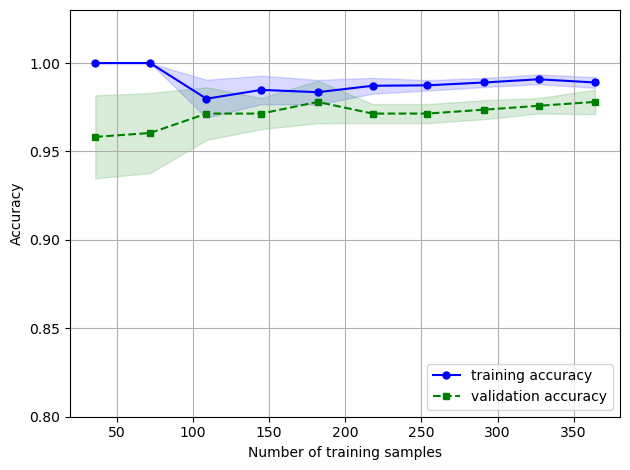

In [17]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression

pipe_lr = make_pipeline(StandardScaler(),
                        LogisticRegression(solver='lbfgs'))

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=pipe_lr,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=5,
                               scoring='accuracy')

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.tight_layout()
#plt.savefig('images/06_05.png', dpi=300)
plt.show()

## Addressing over- and underfitting with validation curves

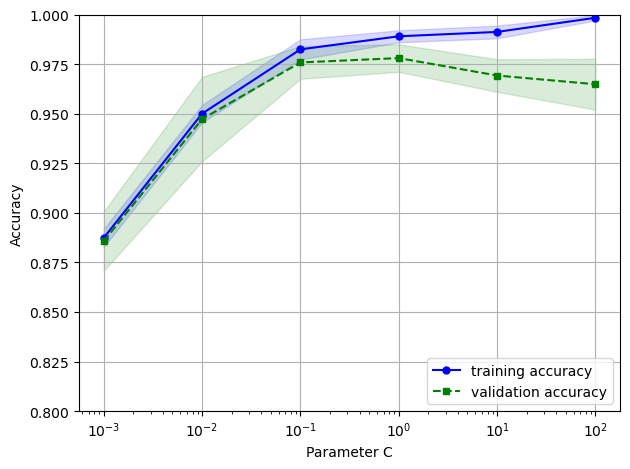

In [18]:
from sklearn.model_selection import validation_curve

pipe_lr = make_pipeline(StandardScaler(), LogisticRegression(solver='lbfgs', max_iter=1000))
#param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
param_range = np.logspace(-3, 2, 6)
train_scores, test_scores = validation_curve(
                estimator=pipe_lr, 
                X=X_train, 
                y=y_train, 
                param_name='logisticregression__C', 
                param_range=param_range,
                cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0])
plt.tight_layout()
# plt.savefig('images/06_06.png', dpi=300)
plt.show()

# Fine-tuning machine learning models via grid search

## Tuning hyperparameters via grid search 

In [19]:
from sklearn.model_selection import GridSearchCV

pipe_svc = make_pipeline(StandardScaler(),
                         SVC(random_state=1))

param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]

param_grid = [{'svc__C': param_range, 
               'svc__kernel': ['linear']},
              {'svc__C': param_range, 
               'svc__gamma': param_range, 
               'svc__kernel': ['rbf']}]



In [20]:
gs = GridSearchCV(estimator=pipe_svc, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  cv=5,
                  n_jobs=-1)
gs = gs.fit(X_train, y_train)

print(gs.best_score_)
print(gs.best_params_)

0.9846153846153847
{'svc__C': 10.0, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}


In [21]:
clf = gs.best_estimator_
clf.fit(X_train, y_train)
print('Training accuracy: %.3f' % clf.score(X_train, y_train))
print('Test accuracy: %.3f' % clf.score(X_test, y_test))

Training accuracy: 0.987
Test accuracy: 0.965


## Algorithm selection with nested cross-validation

In [22]:
gs = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=3)

scores = cross_val_score(gs, X_train, y_train, 
                         scoring='accuracy', 
                         cv=5)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores),
                                      np.std(scores)))

CV accuracy: 0.985 +/- 0.011


<br>
<br>

# Looking at different performance evaluation metrics

In [23]:
from sklearn.metrics import confusion_matrix

y_pred = clf.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

[[66  3]
 [ 1 44]]


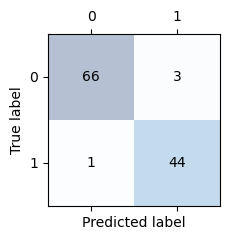

In [24]:
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
#plt.savefig('images/06_09.png', dpi=300)
plt.show()

## Optimizing the precision and recall of a classification model

In [25]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred))

Precision: 0.936
Recall: 0.978
F1: 0.957
